In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
df = pd.read_csv("/kaggle/input/test-file/tested.csv")

In [3]:
columns = df.columns
print("Columns:", columns)

Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
selected_columns = ['Survived', 'Age', 'Fare', 'Sex', 'Pclass']
titanic_df_selected = df[selected_columns]
print(titanic_df_selected.head())

   Survived   Age     Fare     Sex  Pclass
0         0  34.5   7.8292    male       3
1         1  47.0   7.0000  female       3
2         0  62.0   9.6875    male       2
3         0  27.0   8.6625    male       3
4         1  22.0  12.2875  female       3


In [5]:
# Drop rows with missing values from the selected columns
titanic_df_selected = titanic_df_selected.dropna()

# Display the first few rows of the dataset after dropping missing values
print(titanic_df_selected.head())

   Survived   Age     Fare     Sex  Pclass
0         0  34.5   7.8292    male       3
1         1  47.0   7.0000  female       3
2         0  62.0   9.6875    male       2
3         0  27.0   8.6625    male       3
4         1  22.0  12.2875  female       3


In [6]:
# Encode the 'Sex' column into numerical values (0 for female, 1 for male)
titanic_df_selected['Sex'] = titanic_df_selected['Sex'].map({'female': 0, 'male': 1})

# Display the first few rows of the dataset after encoding 'Sex'
print(titanic_df_selected.head())

   Survived   Age     Fare  Sex  Pclass
0         0  34.5   7.8292    1       3
1         1  47.0   7.0000    0       3
2         0  62.0   9.6875    1       2
3         0  27.0   8.6625    1       3
4         1  22.0  12.2875    0       3


In [7]:
# Split the data into features (X) and target variable (y)
X = titanic_df_selected.drop('Survived', axis=1)  # Features (all columns except 'Survived')
y = titanic_df_selected['Survived']  # Target variable

# Display the first few rows of features (X) and target variable (y)
print("Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())


Features (X):
    Age     Fare  Sex  Pclass
0  34.5   7.8292    1       3
1  47.0   7.0000    0       3
2  62.0   9.6875    1       2
3  27.0   8.6625    1       3
4  22.0  12.2875    0       3

Target Variable (y):
0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set - Features (X_train):", X_train.shape)
print("Training set - Target variable (y_train):", y_train.shape)
print("\nTesting set - Features (X_test):", X_test.shape)
print("Testing set - Target variable (y_test):", y_test.shape)


Training set - Features (X_train): (264, 4)
Training set - Target variable (y_train): (264,)

Testing set - Features (X_test): (67, 4)
Testing set - Target variable (y_test): (67,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier with default settings
knn_classifier = KNeighborsClassifier()

# Display the default parameters
print("Default Parameters of KNeighborsClassifier:")
print(knn_classifier)

Default Parameters of KNeighborsClassifier:
KNeighborsClassifier()


In [10]:
# Fit the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Use the KNN classifier to predict probabilities for the positive class (survived) on the test data
y_probabilities = knn_classifier.predict_proba(X_test)[:, 1]

# Display the predicted probabilities
print("Predicted Probabilities for the Positive Class:")
print(y_probabilities)


Predicted Probabilities for the Positive Class:
[0.4 0.6 0.2 1.  0.2 0.  0.2 0.  0.4 0.8 0.6 1.  0.2 0.  0.2 0.4 0.8 0.8
 0.2 0.2 0.4 0.4 0.2 0.2 0.4 1.  0.6 0.4 0.6 0.8 0.2 0.4 0.6 0.  0.2 0.
 0.  0.  0.2 0.  0.  0.8 1.  0.2 0.6 0.6 0.2 0.8 0.  0.8 0.2 0.6 0.  0.
 0.  0.2 0.2 0.6 0.  0.  0.4 0.2 0.  0.2 0.  0.6 0. ]


In [12]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_probabilities)
print(f'ROC AUC Score: {roc_auc}')


ROC AUC Score: 0.7530303030303029


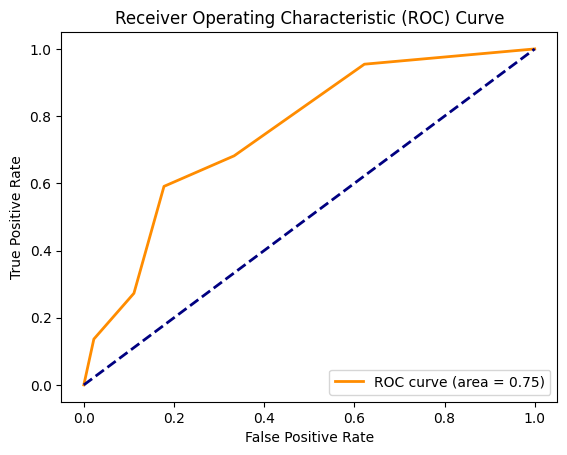

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probabilities)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
